In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

2022-12-22 13:40:27.186749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 13:40:27.536754: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-22 13:40:27.551363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-22 13:40:27.551398: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Text(0.5, 1.0, '2')

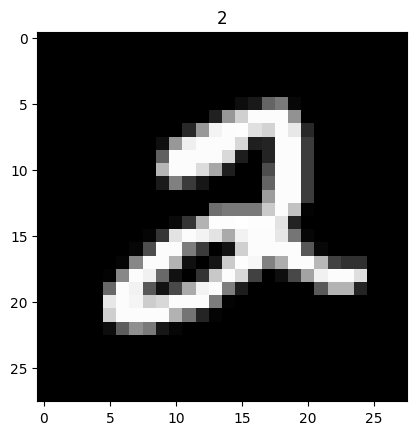

In [4]:
plt.imshow(x_train[5], cmap='gray')
plt.title(y_train[5])

In [5]:
x_train.shape

(60000, 28, 28)

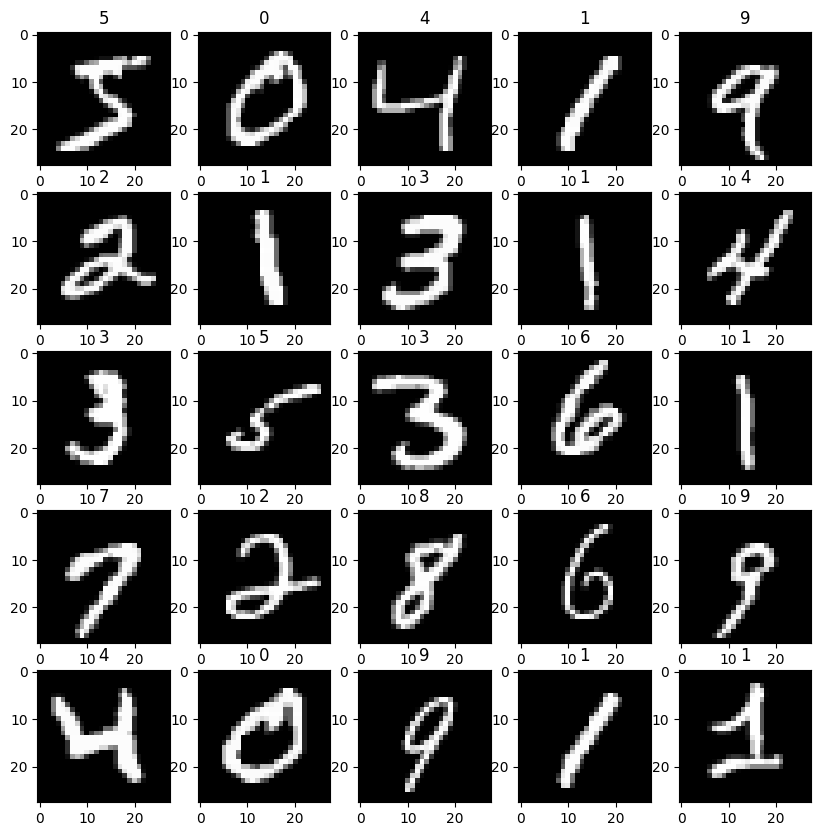

In [6]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
plt.show()

In [7]:
# Feature scaling
x_train = x_train / 255
x_test = x_test / 255

In [8]:
# Reshape the data
x_train.shape

(60000, 28, 28)

In [9]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [10]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

2022-12-22 13:40:36.382377: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-22 13:40:36.382405: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dai-Precision-7820-Tower): /proc/driver/nvidia/version does not exist
2022-12-22 13:40:36.382803: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(loss="sparse_categorical_crossentropy",
         optimizer = "adam", metrics=["accuracy"])

In [15]:
model.fit(x_train, y_train, 
          validation_data=[x_test,y_test],
          epochs=3, batch_size=200)

Epoch 1/3
300/300 [==============================] - 18s 60ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0520 - val_accuracy: 0.9849
Epoch 2/3
300/300 [==============================] - 18s 59ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0529 - val_accuracy: 0.9851
Epoch 3/3
300/300 [==============================] - 18s 60ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0536 - val_accuracy: 0.9845


In [18]:
model.predict(x_test[900].reshape(1,28,28,1))

1/1 [==============================] - 0s 106ms/step


array([[6.7193542e-07, 9.9362284e-01, 1.0717885e-06, 1.5665377e-03,
        3.6520604e-03, 2.0514433e-04, 1.2427416e-06, 9.0922229e-04,
        1.1285827e-06, 4.0034920e-05]], dtype=float32)

In [19]:
import numpy as np

In [28]:
image_number = 486

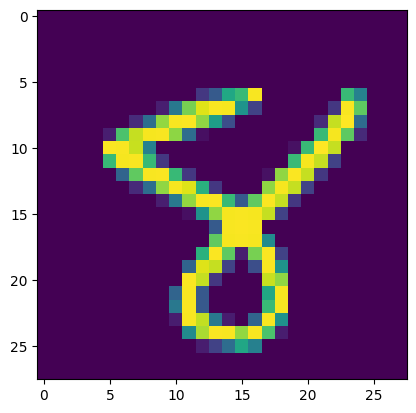

In [29]:
plt.imshow(x_test[image_number])

In [30]:
np.argmax(model.predict(x_test[image_number].reshape(1,28,28,1)))

1/1 [==============================] - 0s 45ms/step


8

In [22]:
x_test[108].shape

(28, 28, 1)

In [32]:
y_pred=model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [33]:
y_pred[3]

array([9.9998432e-01, 2.9193883e-12, 1.4879749e-05, 2.3939496e-13,
       3.9831072e-08, 9.3446804e-12, 3.6695351e-07, 6.9949819e-09,
       1.2341785e-10, 3.9812559e-07], dtype=float32)

In [34]:
max(y_pred[3])

0.9999843

In [35]:
np.argmax(y_pred[3])

0

In [36]:
y_test[3]

0

In [50]:
image= 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYVFRgVFRYZGBgZGRoYHBgYGhgYGRoYGhgZGRoZGhocIS4lHB4rIRgYJjgmKy8xNTU1GiQ7QDszPy40NTEBDAwMEA8QHhISHzQsJCs0NDQ0NjQ1NDQ0NDY0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0MTQ0NDQ0NDQ2NDQ0NDQ0NDQ0NP/AABEIAMIBAwMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAACAwABBAUGB//EADUQAAEDAgQEBAUDBAMBAAAAAAEAAhEDIQQSMUEFUWFxIoGRsROhwdHwMuHxBhRCUmJykhX/xAAYAQADAQEAAAAAAAAAAAAAAAAAAQIDBP/EACgRAAICAgICAQMEAwAAAAAAAAABAhESIQMxQVEiE2FxBDJCgZGhwf/aAAwDAQACEQMRAD8A8+0IwhCNq5DINoRgIWoggCwjaEICY0IESETQryq2tQAbQiAVAIgEBZYCgCgRBAECIFVCkIsLClRDCuEWFklVKkKiEWFlEoSURCohFisCVRKOEJCB2AShJRFCUrCyigJRlAQiwsElAURCEpgCUJREISgdi3ISjcEBCYAQorUQAYCY1CAjASEECiCEBG0IEG1MalhqNoQAYRhC0IwgYQVhUFYCACVhQBXCBEUBVQpCACVoQFcIAsoSrIQEKQLQkIgpCAAUIRZVRCAFOCAhNIQEIAWUJTCEJagBZQOTS1LcFQAFCURaqc1AxbkBTCEBCAFqIoUQMeGo2tVtajAQNooMTWsVAJjQgRQaia1FlRBqAIAiDVA1EAgRQajDEbWog1FDoENVhqYGq4ToVC8qmRNDVAEqCgBTRCmmgKQnQ6FZAhdTTioWooBHw1PhrVRw7nmGgkrrUODCJe4zyEW801FvoajZ5/4aBzF6n/5tEbE+ZS34GjyjzKbgx4HmDSVfBXfrcKaf0O8j91yqzC0kOEEKHFoeKXZiNJD8NaSUtxSpi0JLAhNMI3FUSUUwtCnUwhNJG4oS9FMehbqSQ+ktJehc5GwpGX4aifmURbCkW0qw5Ja9C56ZDZrBTWOWRhTGuhAWa5VsWZj0zNCAs1KBIFRWx6LFZrajASGvWnCXcJ01KY07Y+jhHu0ae+y30OHMBGcknloFlxXFSRkZrMclgfjojxSTtyKlzS6OmHD7PSgMAgBoCW7AU36WPT7LzjMeZkyRK3cPx4qPc1pgtNgbIXJb6LfFo21eFEaOlc11rLsvxREehXO4hTg5xo7aIhU5Lwc84Yq0Z2JraeYgDUrMHLXh6uRpeSOQCFJLsiCcnSOmx4pNyg3WA8Wh+UmYE9lymYtz3Oc47wB9SsuGYS97t5AHv9VD5G3o7FxqK2dp+Me8w3uTcBVSxQzZXOE6gTdYquGe4ZMxYDqWwSfVZ+H/ANNClUD3VHuPI79+arb2LR6KjUgmTCDi7MzGv3Fp5haMRiqLGS9wbaL7z7rmYeux7HMp1RU/U5t/E1tiG9QL3V7SM5pNHNcUDnKPSnFZ2cxZcqLkoqFFgmW5yW4qFAUWFluKAlQlASmOy1EvMogLFSiaFGBPa1AqIwoyVbGq3tQFF0k0hLZZNDkCCaxEArJQkoBoY1E+vkBcTEe6jdFyOP1TDW6DXuVJpxRuRqxL35HOZEuGp0vqVq/pjhzizM8+I8+X5dZuGYoPYAQCRAiYCH+oeLvosayk4A6EjXrCSVvE7ZOlZ6Z/D2NsDHsT5rij+n2trfE8RvMAkEHuLwuDwLjlZ9QMe+Wm552XuhUztkGC3cQnKOLpEqVqzQcOC3UgxuuGzHH4r6L4vGV3/KLT3S63Gs7HXdIdE847LzdTF56hdoR7pfgtRtU/J6xLxz/COQ91opeJjX/7NB891owWF+I4NIkansm45LRxwf050zy1DFeMjaPZdHD1Q17ja5EDyEpPH+FCnUzUwcptCwUqhBvqpaxZ2tqSPRt4pAABA67on41rQXXJ5leS45nyAtJ1ExyWGlUqkZQ8lpbIOuhEjuJC0inJXZlW6N3H8Uatjrsmf0JgT/c53aMa7fdwj0vPkuThOHVKrwzMQZmek3XbwxZRqltEug+GcxIk2JHK6tyxVCxbZ3ce0B5A7rGU3FOLjKQAs7OSXZTgqCJ91A1MSFPCU4o6spYapHWwCVTlb2IXssnZWItRD8NRFixIxPY9LykWKNjEydl/ERh6plCSn1MIW32UuSTphjJ7EhycHQozDkiYVigSi0GLCbVCoPkqCgrbRQKmOD4XB/qCp4wOn57LvtpSFWI4IyvlL3FuXdsSRyuENqLtmvDqR5nh2ZoLgYv+FO4tiA8tbBl0wdpjQHuu3xDg7abAGAxrJMyVx6FEl4a7QHMOmUgkfJOLuVnZVrRx8GHteMrbyu+/idV4bSYQ3OJe7cMnntbzTsBTY2oHHp7lZsbQNIP0lziBzyAyPW3daSS7BwrQ1kTlbp+QsPEMC+m4HI4h4lsAmYsR3+4XQ4NQ8QJ1X07D4Zj6bQR+kWIsRZZwVt0OcsUjxnCi8UGNeCCAbGQYm1jpb2XpMAzJTzbu+QXOr4N3xcgBJnuuli62XwcrLSKrs418pORyOIQ5ebxlO8rvYt8brkYl4AJP5ZYy7OiJlFZpGV2kLl1cK6k4PYJBB6jtrfb0T6ovK2cLY13hdeflO6cW49FNGzgmKpFweLEatOxiCD0W1+FYxxOQB2sxGvfRaeF8ApZw+5I7WT+PUMj52dcLWXyjbRjyy1o5wISHaogUJWRzWA+yFr7K6glA8KgBc5JDk54ssznJWAUoKhKoPK0UqGYSk2oq2XFSlpGWVFodQURnEKkbqjGOJ580ilRv05qQZutBfYALnTlFUjrkoz3VFCkQtWcRdZg4gq2i8c0STkTGos3YZohNbQANglMIAgm6I1su6xt5aOlRio3IXicNewSm4dw2WlmKzarTh6gzLWXLKOjBcEZW0zLSw8rbh8LGuqF9YSYTqbyb6Jx5XJpB9FQ77EcUjLC8lVOV3ey9JxGvAK85iIPuuhy+Wi+O0rE5CDM2ScVVL3Sb8p2CN1O9tEgNMx10TcrNZSvVHRwD8pBOn5qvccI4jYCV4Ci4i0wu5wzFEQbKFJxlaM5RyR7l8BxfaYiV57HVvFPNMqcRluWVgq1J0WspJrRjjQD6gNlz62FmY01grY5Ke0/468uazGtHGq4e+hGo80WEwpD5bbZdMVGk3EGd+tvsiEAnvp6D6Jjs9Bwp4a3WTutHG6Rexp5H6LmYCtHVdPiLi6lA1JEfNaOXwf4M8cpJM88zCEarPVEEroUapyw+xCGq1p2lcseSXkrk4Yp1E5rHCEJeJW5tEAGAhOGYRO6tT2ZPidGWmGuN0GLw7YkIzhoOqccoERNlE28k0y4RTi4tf2caN0ynVOgTX0inUqbW91U5KiOKDy9GMteotvxAos836NvoL2IY8lNp1CDcJTGvHcoqlcjX10MLS70QoWrvZtpFtidSnwB4mxPVc5rZEprntMZQeSynFro6OGUZSSkjotpF8mADzGhSK1MgxzUptcwAOO9vdG/Eg30IsSVEZtGvLwZO0yGmRAi6fh6Tr5rclmdiid781HvLmkEnlI2RK5PRMYRgtshq5XFpC34NhIL75QI81zcPQnK1xJm0nXsu+9gZTyjb3W/FBXfo55Sk3t2jiY68/suJiafXy0ldDiNY6Lil591fbNY6RoZ11VNpyT3+WxWf4sbqMq632ToLLGt7clpoYv7LkGoXaJzHEJuI0zuUMTLiugyYlee4dU8Tu69BhngtuhRozkyVXgC5vy1WX+6gzFhzW4MJ/TDfdZOJ0i1niMyNT9UV5J0Ia8Oh2wPvE+h91MVVyvDtnC+0HT9/Vcym/IQ0enOdfon1q4JaD/sL+tigDv4DEgkAi67nEKcUg4aA7dQvOYB7XGYkzqvVYcBzC2NRve+xVqOUXH2TljJSR5vEPzRva6dkyAHX2WR4dMC5n5pT6j5AmROhXI+OVUmOPKlJuS7Hf3BEiIBO6CnWBJnbZD/cm7XDM0jzCCiAJPmjeLpbK0pK3aDxUiMtwQqazzMJprNcyXC31WZlcCCJ1Av91KcmvuU1GMm30+hlMAEZ+6z1agJJGiuu4azrskMLZga+quKp2wcXJVFAQonNojmqTyRH0mLpVXAE3nZ335hG95cQH35SPmsbXll3OntutGExxLyTYcz2/lJrykdKTpu9e2aqDM5LINpExZMyFpkwPc/ZIa8ucfESBfcD91vp1xmhxaREX2UybqiI8cU1L0Ia8u0BPYTfutBAJOdp6gX8ys3xgLNJ1teBqY+Sa7EEXd3Bbc66bSli7oqU4uLa9jmU2FrsoNuf7qmYV8kghwJ/Ty/ZLOIGre5ndMe9wlzRcixkE/zdDcokxjx8jpOmbcMWNcWnxObueY5BNxdfw91kboXk3iDMTPVSo6QDquiD+JlKNSr0cjFsCxVaIglbsW2TcfwsWKeMhQi30cZ9Q5kwv8BWMugqGtYhb4meR0ME2VsLQNVi4U+y2YoeA89ZWb7NI9GNlWHxsvQ4Op4Zm0rxr6niBXc4XiwfCddlTjozb2eqwlSVOO4fPRPMX9LrHh33XWrNzU3N/wCJ9kovwJryeCe/rsox+Zw5oQ0T8lp+DlAdCOhnX4W+DC9dg6hEcl4fC1PECvX8HfIhOL2S0criNYse6P8Ab5LO9xJzEESJ5dituPxTSXkAF02J0MfTqsNSoNCewGl7d1z5LJtIqXFqnLfod8RjWgQCSLnvpdc7EVMgzQJnTW3OOSP4oNrWEweR07Ln1Q5zp5dTpJjTyURy2dP0YRac2qXX3O0aAewGzHGJuY9EnE0crb3n/XQlYGV3eEE2iTvfp0WgU35ZJeRtMQRsYSUZLsiX0nbixYfEiASOapkWgXPyTM45DQG4+/VQVmgAt1O2t9yEO9to1yhSjx6K+Cor+JOpCiWyah9v8nOc+WXAzCAJ32vHv0VMeTcaRoPT1UDjv9/zdPwwYCcwJBMwDE6em66UlE43OU3TZfxDFjH08j5rPTfFQH/GIOuux9vVdEZIDg03/wASZJ10WesxrnEsMReDaB3CSf2Lxcdt2vyBUeSDlnlYW/aZjzW3M4NuBIbMiT6mNVmZSynMTJ6dQiOY6kiNB0Uyje0HHyYJxaLZWJFrERY8uS1UK8PnNF8sH5n3SAwkEgAkGSCYOn3CoUxEkGTfXTpEW0VaMkqVmp/E6bWmGkki5Mmbi5jTdOpYghg8MHlyWRjACC0lpI1HzWx+JtYnT16pSbXSNYSUv3Mw4iqXW81ysfUAGUFd4szEHciTbe0D0WOjgG58z7NzTI1gTHlonF1tjlK/ijzmEw4qVMjnZZDo/wC0GJ5DfyWN9F8uBaQWmCDzJiPr2C9nV4RTbL2E3sARH+QM/RMY5wESGxpIJJkWtH5AV/V3a6E41Gn2n/o83wymbwJHPzifkt9eg+LtdHYr0mGovIzta0wP1ESTFrA7a+aTicUXEseI7QLayVjLmblUUaxioxts8HVoS6CYEgf+jCfTpuY4TYh3PsPeV6H+0a46B0mRAmY3+fyS34YOJOpFyInz9V0qejlcrejRhq51G8Qu/gapJgrzlF+RoJH6SB7rs4bHgNaQJnXtf6j0Wa0y80zy2Mp5a1QRAzkDydt5StzHeAhw5R3v+y1YqiHkvLSYiSev8fNEzCHIXQYi4vr/ALeycpRJTb6MWDEEh3Neg4NispjWI91xsku+YHLf1lacFigx4JESbj5T2sldOxxldoPEuBe4Cf1PPYSdPKEqoY1v1vEbQixpl2azcxz9mkl31Wdz3a+23ltYQijFsJgGgAnTQXFypUaJFoNpHa10sP0k6T57FU95vHI+u3tKhRqV2bz5lKCikEH6HS8Wtzv8lH4g6ZjzSiYhrfXSR2S4BubR67WlWYeQ3vkXMnvos9YCYB2k9BB/ZNJGmgF/XbsgcRcTrqfzyQhtC845Kk2GjU+32USv7F4L2iw0N8R5/wApgLZnpbr+SiZRAbLryhqgCI0SU03Q3xySyNmH0s0T11hDXptyl4buJA36j1WZmKgEj85pjMRLSIs5ZyjLK0brk43DFrf/AEjHkEToLeWv1RtqeG2u37pDpBsDG/7LQGCIsPyytoxhJ3ogqz1OhHTurp1IttM37KvDlJnTlunso+Eacxf6JXRbhKVui6RBIbFo1+v5zUpUrS0mZseg/ZXUp5csGJEn7JB3yny6JmdeTVkMAZpBE6+6EBp1voI5HpOqz0HEmIdBn87J76TmAOkCL2OilySHGN72zSwiCMps3U8xv0SXMgNh2aBMcryPNXSe4eIWn27JbzcmIkHpdSk15NJtOlT0hrsU5oDWm4HPUlBWgguzQZh2942/N1VGhvJsFK+HIaRFiAdfnKa41HYp8mcVFKqDe8OAIIsI6aCAg+EybX941hK+BAtp6BAKRkA7WHUdfNWrMHSZrpMdJgCQC6NyLCPdHVdDA4akxlIsIsdFj+GQ6ZuDqmtk5i4yYsJsLqXGTlZpGSUWinVSBlHOT8rdvuirV5AuZm4HIbhIdUmABBBQmoXEgDpMaxyQ0m7Yk5JNJ6LYDrH8G3qjqUhIBA7q35iLeQO3klZw0nWXX59Crt+BY492h9UTF9p6W5rOHXtbrqCmMfM37D6IHO3jS0QqszaElsjz2/PyUM9xt5HmnOp3LucTr5KN6yeulrWSseIhwI3N+Qm/0WlmAJvmE9iVnByyWiZjW+2vfRCKrm3Lv1SegG0KJZ/x0dEI8P8AJgPwbw8NJJJuIs358kb8C8XBB8+Xkl1a73ZfFEbi89Cmf3Dxpv8AIo+euga4ndt/YxqJ2ZxUW1nKU2qYhbGUnPG0Bc41YNkfxyNDZZuPpHUqqpMaBDoMLXSeAdlz2G0prAm1rZkpVK0bGPBOuiW1/iskOEaI2uRQsjW6nqQELn2HLRLp1LJrItbzU1eminJLcWW6oHRJNrJgeAARCVUeJkD0Vt1VeCOn7HtqHTZU+mDY81TjLdCEArZrfIqHFNFqbTq9DXY1osGh0LQ+vLASIKw0yGnaEym7MTm8lkuJqV+jp5P1EJRxSoMm0ib6p2HxAaIiTEa29Fb6sgAAWGyVSNiVs1aOSLp2mVVq5rZR5WQPNwdh7q3uEjmtVMMIg3PNLJRQ8XKRhd4nfMKF02Oye7DgWDro8zMpafXql9RFr9PK9invsMplwtJ7JmGw5yyCB1O6x1WhpiZt280lmMc5uUCA2w5lHJtfE04INy+Wjc/CFpzyHc+Y6rM57TYNjqU2jUJF9YSXMgzolxW07H+q1JK7FtfBn+I5pralp8jCsZc0xsiDmkm9lbm1qjCPGmrtWZX1yDzCgrSLW3/YI3UWiZdultwx/wASO3RNNIlpt0AJOm2+k/dFiMOSf1AkDTYIXU8p1Uc6Ab3KbtvTBYpbM+QzB53joiLJvOm31U0gqw8AppiUbYlzSrROlROx4GU7p9LRRRNkjGaKU1aiTAa3VG/RRRICN1T9lFEIkGjqrd+oKKKZdG/D3/RpSn7KKKV2iZFHTzRqKKo+SJeAqSa3TzVqKkJCRqjaoospdGkOxjvosVTdRRZI7I/uQGM0CSz9QVqLVdErt/k1sQV9VFFUejj5OyO+iUoorJCqaoHKKIGxDtUkqlEehewquigUUQ+io/uGtUUUWZ1H/9k='

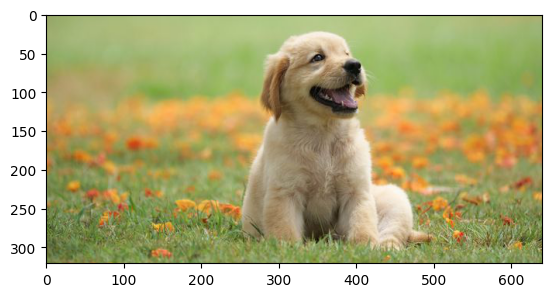

In [48]:
plt.imshow(img)

In [49]:
img.shape

(321, 640, 3)